<a href="https://colab.research.google.com/github/happy725/10510037/blob/master/Comics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

The above function is written to display plotly charts in google colab. We call this function to display graphs whenever we use plotly for plotting graphs.

In [2]:
#importing lib
import pandas as pd
import numpy as np
import altair as alt
#alt.renderers.enable('notebook') - Use this code in case of Jupyter Notebook
import io
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

In this cell, we are importing all the libraries required in our project.

In [3]:
from google.colab import files
uploaded = files.upload()
#Use in below code in case of Jupyter Notebook and check Path
#url = r'/Users/happy/Documents/DataSetVisualization/heros.csv'

Saving heros.csv to heros.csv


We are uploading our heros dataset by using files.upload function.

In [4]:
heros = pd.read_csv(io.StringIO(uploaded['heros.csv'].decode('latin-1')))
# Use below code in case of Jupyter Notebook
#heros = pd.read_csv(url)
heros.head()

Unnamed: 0         name Gender  ... Skin color Alignment Weight
0           0       A-Bomb   Male  ...          -      good  441.0
1           1   Abe Sapien   Male  ...       blue      good   65.0
2           2     Abin Sur   Male  ...        red      good   90.0
3           3  Abomination   Male  ...          -       bad  441.0
4           4      Abraxas   Male  ...          -       bad  -99.0

[5 rows x 11 columns]

Reading the dataset from csv and displaying first 5 rows.

In [5]:
heros = heros.replace(r'-', np.nan, regex=True)
heros = heros.replace(r'-99.0', np.nan, regex=True)
heros.head()

Unnamed: 0         name Gender  ... Skin color Alignment Weight
0           0          NaN   Male  ...        NaN      good  441.0
1           1   Abe Sapien   Male  ...       blue      good   65.0
2           2     Abin Sur   Male  ...        red      good   90.0
3           3  Abomination   Male  ...        NaN       bad  441.0
4           4      Abraxas   Male  ...        NaN       bad  -99.0

[5 rows x 11 columns]

A lot of ccolumns in this dataset contains '-' and '-99' values. Replacing those values with NAN.

In [6]:
from google.colab import files
uploaded = files.upload()
# Use below code in case of Jupyter Notebook
# url2 = r'/Users/happy/Documents/DataSetVisualization/super_heros.csv' 

Saving super_heros.csv to super_heros.csv


We are uploading dataset of Super Heros using files.upload function.

In [7]:
super_heros = pd.read_csv(io.StringIO(uploaded['super_heros.csv'].decode('latin-1')))
# Use below code in case of Jupyter Notebook
# super_heros = pd.read_csv(url2)
super_heros.head()

hero_names  Agility  ...  Omnipresent  Omniscient
0      3-D Man     True  ...        False       False
1       A-Bomb    False  ...        False       False
2   Abe Sapien     True  ...        False       False
3     Abin Sur    False  ...        False       False
4  Abomination    False  ...        False       False

[5 rows x 168 columns]

Reading super heros file and displaying top 5 rows.

In [8]:
publishers = ['Marvel Comics', 'DC Comics']
marvel_dc = heros.loc[heros.Publisher.isin(publishers)]
marvel_dc.rename(columns={'name':'hero_names'}, 
                 inplace=True)
marvel_dc.head()


Unnamed: 0     hero_names Gender  ... Skin color Alignment Weight
0           0            NaN   Male  ...        NaN      good  441.0
2           2       Abin Sur   Male  ...        red      good   90.0
3           3    Abomination   Male  ...        NaN       bad  441.0
4           4        Abraxas   Male  ...        NaN       bad  -99.0
5           5  Absorbing Man   Male  ...        NaN       bad  122.0

[5 rows x 11 columns]

Fetching data of only publishers with DC comics and Marvel Comics.

In [0]:
Marvel_DC_Power = pd.merge(marvel_dc, super_heros, on='hero_names', how='inner')
weighted_power = Marvel_DC_Power[Marvel_DC_Power==True].count(axis=1)
Marvel_DC_Power['weighted_power'] = Marvel_DC_Power[Marvel_DC_Power==True].count(axis=1)
Marvel_DC_Power = Marvel_DC_Power.sort_values(by='weighted_power', ascending=False)
Top20SuperHeros = Marvel_DC_Power.head(20)
Top20SuperHeros = Top20SuperHeros.dropna(axis=0, subset=['Gender'])


Firstly, we are merging the dataset of marvel and dc and then checking the number of powers each super hero has and appending that value to the dataframe.

In [10]:


interval = alt.selection_interval()

points = alt.Chart(Top20SuperHeros).mark_point().encode(
  x='hero_names',
  y='weighted_power',
  color=alt.condition(interval, 'Gender', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(Top20SuperHeros).mark_bar().encode(
  x='Publisher',
  y='hero_names',
  color='Gender'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

This plot gives the overview of top 20 Super Heros and their Gender. Also the bottom plot gives us an overview about their publishers. This gives us an insight of which publisher had published which type of super heros. We can see that most of the heros had a gender of only male and female. Also female superheros are less published by both DC comics and Marvel Comics.

In [11]:
from google.colab import files
uploaded = files.upload()
# Use below code in case of Jupyter Notebook
# url3 = r'/Users/happy/Documents/DataSetVisualization/marvel-wikia-data.csv'

Saving marvel-wikia-data.csv to marvel-wikia-data.csv


In [12]:
marvel_wikia = pd.read_csv(io.StringIO(uploaded['marvel-wikia-data.csv'].decode('latin-1')))
# Use below code in case of Jupyter Notebook
# marvel_wikia = pd.read_csv(url3)
marvel_wikia.head()

page_id                                 name  ... FIRST APPEARANCE    Year
0     1678            Spider-Man (Peter Parker)  ...           Aug-62  1962.0
1     7139      Captain America (Steven Rogers)  ...           Mar-41  1941.0
2    64786  Wolverine (James \"Logan\" Howlett)  ...           Oct-74  1974.0
3     1868    Iron Man (Anthony \"Tony\" Stark)  ...           Mar-63  1963.0
4     2460                  Thor (Thor Odinson)  ...           Nov-50  1950.0

[5 rows x 13 columns]

Reading Dataset of marvel characters and their features.

In [13]:
from google.colab import files
uploaded = files.upload()
# Use below code in case of Jupyter Notebook
# url4 = r'/Users/happy/Documents/DataSetVisualization/dc-wikia-data.csv'

Saving dc-wikia-data.csv to dc-wikia-data.csv


In [14]:
dc_wikia = pd.read_csv(io.StringIO(uploaded['dc-wikia-data.csv'].decode('latin-1')))
# Use below code in case of Jupyter Notebook
# dc_wikia = pd.read_csv(url4)
dc_wikia.head()

page_id                         name  ... FIRST APPEARANCE    YEAR
0     1422         Batman (Bruce Wayne)  ...        1939, May  1939.0
1    23387        Superman (Clark Kent)  ...    1986, October  1986.0
2     1458   Green Lantern (Hal Jordan)  ...    1959, October  1959.0
3     1659     James Gordon (New Earth)  ...   1987, February  1987.0
4     1576  Richard Grayson (New Earth)  ...      1940, April  1940.0

[5 rows x 13 columns]

Reading DC characters and their features.

In [15]:

configure_plotly_browser_state()
trace1 = go.Scatter3d(
    x = dc_wikia['APPEARANCES'],
    y = dc_wikia['YEAR'],
    z = dc_wikia['ALIVE'],
    name = 'DC',
    mode='markers',
    marker=dict(
        size=10,
        color = 'black',                    
    )
)

trace2 = go.Scatter3d(
    x = marvel_wikia['APPEARANCES'],
    y = marvel_wikia['Year'],
    z = marvel_wikia['ALIVE'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = 'red'
    )
)

data = [trace1, trace2]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


This plot gives us a 3D insight of how many Marvel and DC characters made appearances by year and whether the characters are alive or dead. From the plot we can see that number of living characters are more both in Marvel and DC compared to dead characters.

In [16]:
configure_plotly_browser_state()
trace = go.Box(
            x = dc_wikia['ALIGN'],
            y = dc_wikia['APPEARANCES'],
            name = 'DC',
            marker = dict(
                  color = 'blue')
)
                   

trace2 = go.Box(
            x = marvel_wikia['ALIGN'],
            y = marvel_wikia['APPEARANCES'],
            name = 'Marvel',
            marker = dict(
                   color = 'green'),

              )

data = [trace, trace2]

layout = go.Layout(
    boxmode = 'group',
    title = 'Character vs Appearances')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

This box plot gives us an insight of the characters of the published in DC and Marvel. From the plot we can see that there are no Reformed Criminal characters in Marvel while DC has quite a few of them. Also the number of good characters are more in Marvel than in DC wherease the number of characters is more in Marvel than in DC. The number of Bad characters are almost same for both Marvel and DC.

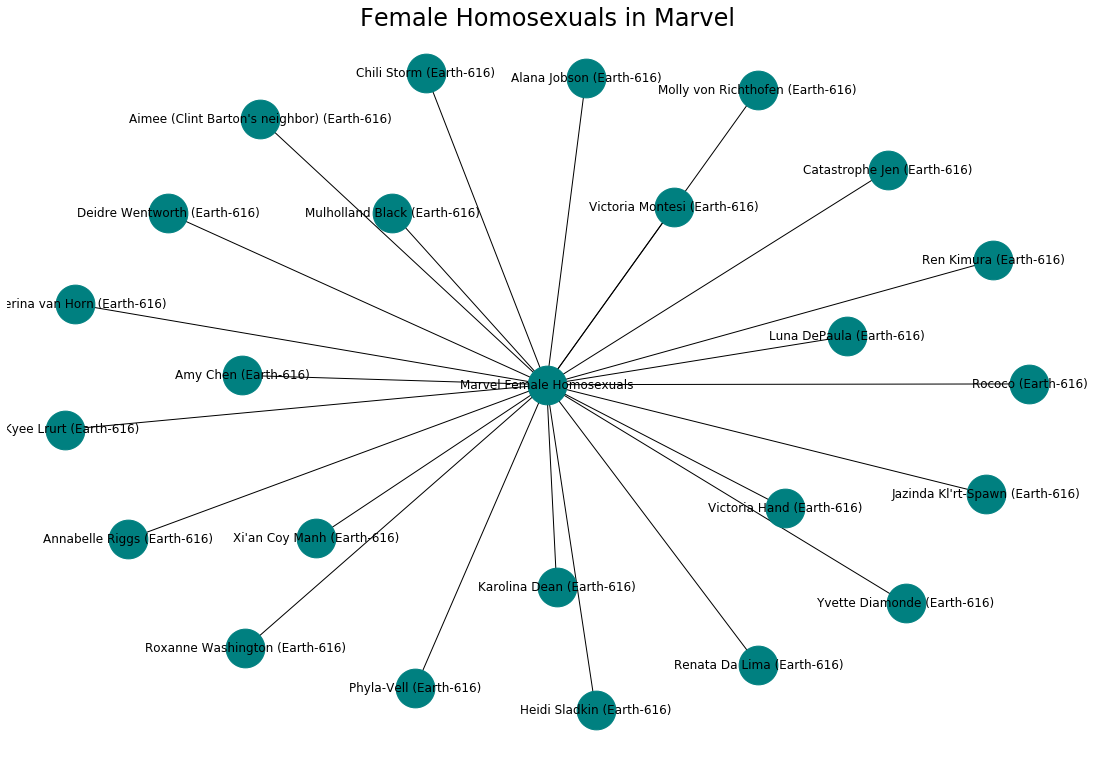

In [17]:
import networkx as nx
dataframeMarvel=marvel_wikia[(marvel_wikia['SEX']=='Female Characters') & (marvel_wikia['GSM']=='Homosexual Characters')]
dataframeMarvel['midnode'] ="Marvel Female Homosexuals" 
G=nx.from_pandas_edgelist(dataframeMarvel, 'midnode', 'name')
plt.figure(figsize=(15,10))
nx.draw(G, with_labels=True, node_color='teal', node_size=1500, width=1.0)
plt.title("Female Homosexuals in Marvel", size=24)
plt.show()

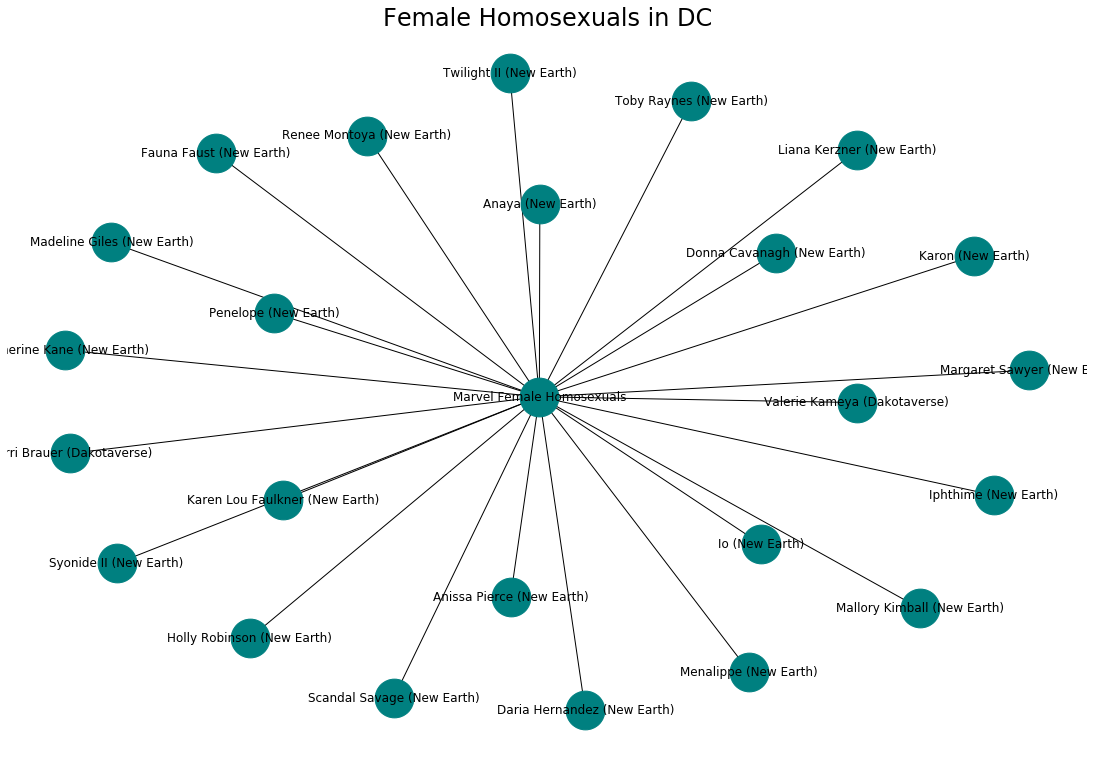

In [18]:
dataframedc=dc_wikia[(dc_wikia['SEX']=='Female Characters') & (dc_wikia['GSM']=='Homosexual Characters')]
dataframedc=dataframedc[(dataframedc['SEX']=='Female Characters') & (dataframedc['GSM']=='Homosexual Characters')]
dataframedc['midnode'] ="Marvel Female Homosexuals" 
G=nx.from_pandas_edgelist(dataframedc, 'midnode', 'name')
plt.figure(figsize=(15,10))
nx.draw(G, with_labels=True, node_color='teal', node_size=1500, width=1.0, edge_cmap=plt.cm.Reds)
plt.title("Female Homosexuals in DC", size=24)
plt.show()


Both Marvel and DC contains many female characters with many sexual orientation. We wanted to see the names of the female characters with Homosexual orientation. This plot gives us their name in the nodes.

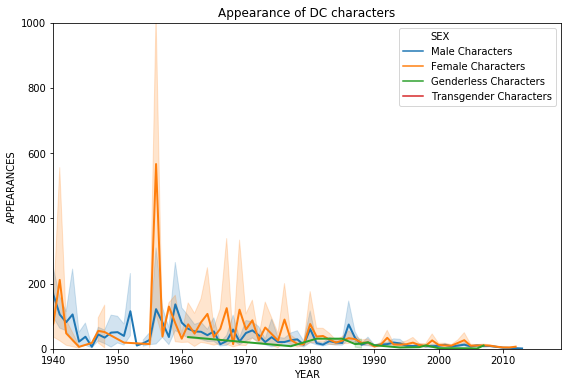

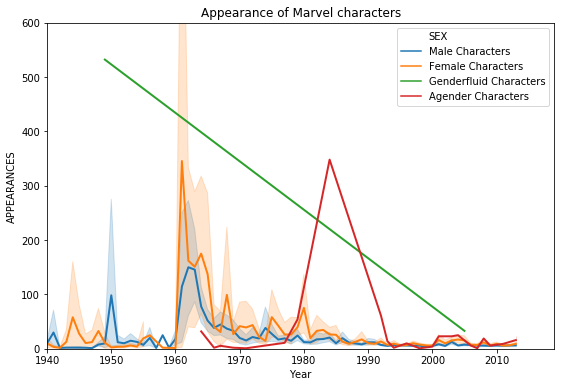

In [19]:
import seaborn as sns

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.lineplot(x = 'YEAR',y = 'APPEARANCES',hue = 'SEX',data= dc_wikia,markers= True,dashes=False,lw=2)
plt.xlim(1940,2019)
plt.ylim(0,1000)
plt.title("Appearance of DC characters")
plt.show()


plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
sns.lineplot(x = 'Year',y = 'APPEARANCES',hue = 'SEX',data= marvel_wikia,markers= True,dashes=False,lw=2)
plt.xlim(1940,2019)
plt.ylim(0,600)
plt.title("Appearance of Marvel characters")
plt.show()

This plot gives us an insight of how many DC and Marvel characters made appearance and their sexual orientation. From the DC plot, we can see that number of Female character appearance increased in 1950 - 1960. However, Male character appearance seems to fluctuating from 1940 till 1990 and is on decline. The other characters appearances seems to really less.

In Marvel Plot, we can see that the appearance of both Male and Female characters surged in 1960-1970 and has been declining ever since. However, there is a slight rise in the year 2000. There is a steep decline in appearance of Genderfluid characters.Agender characters made first appearance in 1960  and the appearances increased 1980-1990 and it declined steeply in the mid of 1990s.

In [20]:
configure_plotly_browser_state()
gsm_dc = dc_wikia['GSM'].value_counts()
gsm_marvel = marvel_wikia['GSM'].value_counts()

label_dc = gsm_dc.index
size_dc = gsm_dc.values

label_marvel = gsm_marvel.index
size_marvel = gsm_marvel.values

colors = ['EC6B56','FFC154']

trace = go.Pie(
         labels = label_dc, values = size_dc, marker = dict(colors = colors), name = 'DC', hole = 0.3)
colors2 = ['7982B9', 'A5C1DC']

trace2 = go.Pie(labels = label_marvel, values = size_marvel, marker = dict(colors = colors2), name = 'Marvel', hole = 0.3)

data = [trace]
data2 = [trace2]

layout1 = go.Layout(
           title = 'Sexual Minority Groups in DC')
layout2 = go.Layout(
           title = 'Sexual Minority Groups in Marvel'  )

fig = go.Figure(data = data, layout = layout1)
fig2 = go.Figure(data = data2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)

This plot gives us the insight of all the minority sexual orientation of characters.As seen in the Marvel plot , the number of minority groups are less compared to minority groups in DC. DC contains only 2 types of minority groups with Homosexual comprising of 84% and rest of Bisexual group. Marvel however contains 6 minority groups with Homosexual comprising of 73% followed by Transgender group of 21%. Trangender and other groups made up the rest of percentages.We can clearly see that number of minority groups in Marvel is more compared to DC and are trying to bring more characters of different sexual orientation.


In [21]:
configure_plotly_browser_state()
sex_count = dc_wikia['ID'].value_counts()
sex1_count = marvel_wikia['ID'].value_counts()
trace1 = go.Bar(
    x=sex_count.index,
    y=sex_count.values,
    name='DC',
     marker = dict(
                  color = 'indianred')
)
trace2 = go.Bar(
    x=sex1_count.index,
    y=sex1_count.values,
    name='Marvel',
     marker = dict(
                  color = 'lightsalmon')
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title= 'Identity comparisions in between DC and Marvel'
    
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

This plot gives us an  comparison of Identities of characters in Marvel and DC. From the plot, we can see that Marvel has around 6275 Secrect Identities, 4528 Public Identities, No Identity Unknown, 1788 No dual Identity, and 15 Known to Authorities Identity whereas DC has 2408 Secret Identities, 2466 Public Identities, 9 Identities unknown, 0 Non-dual identities, and known to authorities identities. Marvel has more diverse identities and also has characters of Identity unknown and known to Authorities Identity as well.


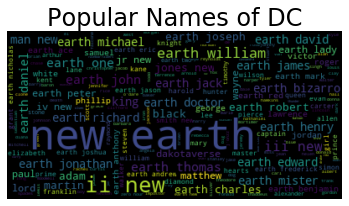

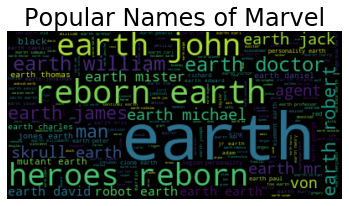

In [22]:
DC_NAME = dc_wikia['name'].tolist()
DC_NAME1 = "".join(str(v) for v in DC_NAME).lower()
from wordcloud import WordCloud
wordcloud = WordCloud().generate(DC_NAME1)
#plt.subplot(1, 2, 1)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Popular Names of DC',size=24)
plt.show()

MARVEL_NAME = marvel_wikia['name'].tolist()
MARVEL_NAME1 = "".join(str(v) for v in MARVEL_NAME).lower()
from wordcloud import WordCloud
wordcloud = WordCloud().generate(MARVEL_NAME1)

# Display the generated image:
#plt.subplot(1, 2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.title('Popular Names of Marvel',size=24)

plt.show()

This plot gives us an insight of most popular names of Marvel and DC. From  the plot of DC, we can see that new earth, earth thomas, earth richard comes to surface whereas for Marvel we can see that earth, earth william, earth reborn are most popular. We can also see that most of the names in marvel as well as in DC contains the word earth.

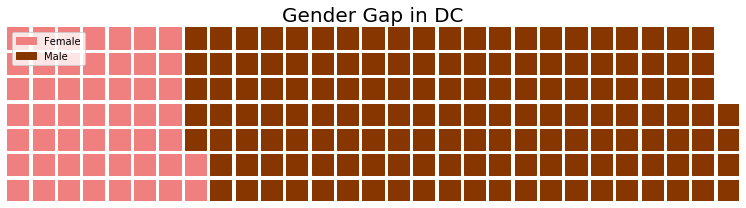

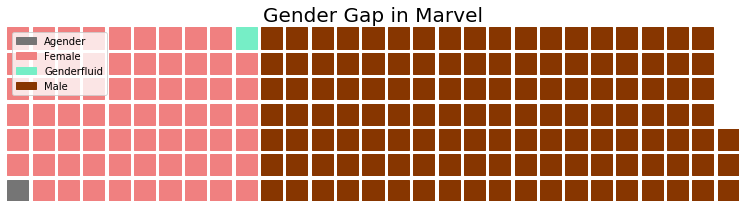

In [25]:

from pywaffle import Waffle

dataframe = dc_wikia.iloc[:200,:].groupby('SEX').size().reset_index(name='counts')

n_categories = dataframe.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

fig = plt.figure(
    FigureClass=Waffle,
    values = dataframe['counts'],
    labels = ['Female','Male'],
    legend = {'loc': 'upper left'},
    title = {'label': 'Gender Gap in DC', 'fontsize': 20},    
    rows=7,
    colors=['#F08080','#873600'],
    figsize = (20, 3)
)



dataframe1 = marvel_wikia.iloc[:200,:].groupby('SEX').size().reset_index(name='counts')
n_categories = dataframe1.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]


fig = plt.figure(
    FigureClass=Waffle,
    values = dataframe1['counts'],
    labels = ['Agender','Female', 'Genderfluid','Male'],
    legend = {'loc': 'upper left'},
    title = {'label': 'Gender Gap in Marvel', 'fontsize': 20},    
    rows=7,
    colors=['#757575','#F08080', '#76EEC6','#873600'],
    figsize = (20, 3)
)



In [24]:
!pip install pywaffle

     |████████████████████████████████| 532kB 8.6MB/s 


This plot gives us the insight of gender gap of both both Marvel and DC. We can see that both in Marvel and DC, number of female characters are less compared to their male counter parts. Also the number of genders in DC is less than compared to Marvel.

In [26]:
configure_plotly_browser_state()
character_eyes = dc_wikia.groupby(['ALIGN','EYE']).count().name.reset_index()
character_eyes = character_eyes.groupby(['ALIGN','EYE']).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_eyes
character_eyes_B=character_eyes[(character_eyes['ALIGN']=='Bad Characters')]
character_eyes_G=character_eyes[(character_eyes['ALIGN']=='Good Characters')]
character_eyes_N=character_eyes[(character_eyes['ALIGN']=='Neutral Characters')]
character_eyes_RC=character_eyes[(character_eyes['ALIGN']=='Reformed Criminals')]

trace0 = go.Scatter(
    x=character_eyes_B['ALIGN'],
    y=character_eyes_B['EYE'],
    mode='markers',
    name='Bad Characters',
    text=character_eyes_B['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=10,
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=character_eyes_G['ALIGN'],
    y=character_eyes_G['EYE'],
    mode='markers',
    name='Good Characters',
    text=character_eyes_B['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=15,
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=character_eyes_N['ALIGN'],
    y=character_eyes_N['EYE'],
    mode='markers',
    name='Neutral Characters',
    text=character_eyes_N['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=20,
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=character_eyes_RC['ALIGN'],
    y=character_eyes_RC['EYE'],
    mode='markers',
    name='Reformed Criminals',
    text=character_eyes_B['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=25,
        line=dict(
            width=2
        ),
    )
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
        showlegend=True,
        xaxis=dict(
            title="Character"
        ),
        #yaxis=dict(
         #   title="Eye"
        #),
        title="Eye Characters Bubble For DC" 
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Eye Characters Bubble')


This plot gives us an insight of characters and their eye and hair colors of both DC and Marvel. We can see that all characters have different eye colors and much insight can be drawn here whether the eye color can be used as a parameter to see the difference between the characters.

Task Distribution:
Apart from regular brainstorming to sort out issues, our team has divided the tasks in the following manner:

Anjali Panda has worked on the visualisations for:
1.	Who are the top 20 Super Hero’s and who is their Publisher?
2.	How many Marvel & DC characters made appearance since 1940 and are they currently living or dead?
3.	Which Publisher has made the greatest number of Good Characters or Bad Characters?
4.	How many DC & Marvel characters have made appearance what is their sexual orientation?

Happy Justin Pilli has worked on the visualisations for:
1.	Who are the female characters in Marvel & DC with LGBT traits?
2.	How many sexual minority groups are there in DC & Marvel and at what ratio?
3.	What are the different character identities in DC and Marvel and how do they compare?

Ometere Precious Okuo has worked on the visualisations for:
1.	What are the most popular names used in Marvel & DC?
2.	How does gender gap compare between Marvel & DC?
3.	What are the different eye and hair colors of the characters in Marvel & DC Comics and how are they classified according to their character orientation?
